<a href="https://colab.research.google.com/github/Festuskipkoech/langgraph/blob/main/1_simple_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from typing import TypedDict

class PortFolioState(TypedDict):
  amount_usd: float
  total_usd: float
  total_ksh: float

In [11]:
def calc_total(state: PortFolioState) -> PortFolioState:
  state['total_usd'] = state['amount_usd'] * 1.08
  return state

def convert_to_ksh(state: PortFolioState) -> PortFolioState:
  state['total_ksh'] = state['total_usd'] * 130
  return state

In [7]:
!pip install -U langgraph

In [12]:

from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortFolioState)

builder.add_node('calc_total_node', calc_total)
builder.add_node('convert_to_ksh_node', convert_to_ksh)

builder.add_edge(START, 'calc_total_node')
builder.add_edge('calc_total_node', 'convert_to_ksh_node')
builder.add_edge('convert_to_ksh_node', END)

graph = builder.compile()

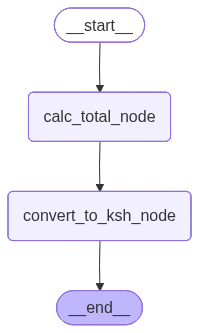

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_ksh': 140400.0}